# **1. INSTALL AND IMPORT REQUIRED LIBRARIES**

In [ ]:
# Installed Required libraries

!pip install python-docx pdfplumber nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.4 MB/s eta 0:00:00


In [ ]:
# Installed antiword for .doc text extraction

!apt-get install -y antiword


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (199 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-16_amd64.deb ...
Unpacking antiword (0.37-16) ...
Setting up antiword (0.37-16) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...


In [ ]:
# Imported Required Libraries

import os
import pandas as pd
import re
import nltk
import subprocess
import pdfplumber
from docx import Document

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **2. UNZIP FOLDER**

In [ ]:
import zipfile

zip_path = "/content/P637 Dataset.zip"
extract_path = "/content/P637 Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")


Unzipped successfully!


# **3. TEXT EXTRACTION**

In [ ]:
# Text Extraction Functions

# User defined function for extracting the text from .pdf file format using pdfplumber
def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            if page.extract_text():
                text += page.extract_text() + " "
    return text.strip()

# User defined function for extracting the text from .docx file format using Document
def extract_text_from_docx(file_path):
    doc = Document(file_path)
    return " ".join(p.text for p in doc.paragraphs).strip()

# User defined function for extracting the text from .doc file format using antiword with Exception Handling
def extract_text_from_doc(file_path):
    try:
        result = subprocess.run(
            ["antiword", file_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        return result.stdout.strip()
    except Exception as e:
        print("Error reading .doc:", file_path)
        return ""


In [ ]:
# Path of Folder where all the resume files are available

dataset_path = "/content/P637 Dataset/P637 Dataset/Resumes_Docx"


In [ ]:
# Function to extract text from PDF, DOCX, and DOC files based on file extension

def extract_text(file_path):
    if file.lower().endswith(".pdf"):
        return extract_text_from_pdf(file_path)

    elif file.lower().endswith(".docx"):
        return extract_text_from_docx(file_path)

    elif file.lower().endswith(".doc"):
        return extract_text_from_doc(file_path)

    return ""


# **4. DATAFRAME CREATION**

In [ ]:
# This reads all files from category-wise folders, extracts text from each document,
# assigns appropriate labels, and stores the processed data

data = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)

    if os.path.isdir(folder_path):
        category = "Peoplesoft" if "peoplesoft" in folder.lower() else folder

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)

            try:
                text = extract_text(file_path)

                if text.strip():
                    data.append({
                        "Category": category,
                        "Text": text
                    })

            except Exception as e:
                print("Error reading:", file_path)


In [ ]:
# Created the dataframe from extracted text and category

import pandas as pd
df = pd.DataFrame(data)
df.head()


,Category,Text
0,Peoplesoft,Name: G. Ananda Rayudu LinkedIn: https://www.l...
1,Peoplesoft,R Ahmed\n PeopleSoft ...
2,Peoplesoft,Anubhav Kumar Singh\t\t To work in a global...
3,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, N..."
4,Peoplesoft,PEOPLESOFT Administrator\n\n\nSRINIVAS.K\nExpe...


In [ ]:
# Different Categories with its count

df["Category"].value_counts()


,count
Category,
React Developer,24
Peoplesoft,21
workday,21
SQL Developer,14


In [ ]:
# Top 30 entries of dataframe

df.head(30)


,Category,Text
0,Peoplesoft,Name: G. Ananda Rayudu LinkedIn: https://www.l...
1,Peoplesoft,R Ahmed\n PeopleSoft ...
2,Peoplesoft,Anubhav Kumar Singh\t\t To work in a global...
3,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, N..."
4,Peoplesoft,PEOPLESOFT Administrator\n\n\nSRINIVAS.K\nExpe...
5,Peoplesoft,"Priyanka Ramadoss\n\n61/46, MountPleasant,\nCo..."
6,Peoplesoft,Tanna Sujatha OBJECTIVE Seeking a challeng...
7,Peoplesoft,Murali Experience Summary I have 6 years of...
8,Peoplesoft,Rahul Ahuja\n---------------------------------...
9,Peoplesoft,PeopleSoft Administration Vivekanand Sayana ...


In [ ]:
#Bottom 30 entries of dataframe

df.tail(30)

,Category,Text
50,SQL Developer,RAJU PAVANA KUMARI Professional Summary: Hav...
51,SQL Developer,Name: Ramesh Career Objective: ...
52,SQL Developer,Career objective\n\n\nA rewarding opportunity ...
53,SQL Developer,B. vinod kumar OBJECTIVE: Willing to work und...
54,SQL Developer,SQL SERVER DEVELOPER P. Syam Kumar ...
55,SQL Developer,Aradhana Tripathi Current Location: Gachibowl...
56,React Developer,SHAIK ABDUL SHARUK 2 years’ Experience in W...
57,React Developer,Ranga Gaganam Having 1+ years of success...
58,React Developer,Name: M. Prabakaran\nTitle: UI Developer\nPROF...
59,React Developer,HARIPRIYA BATTINA Experience as UI Developer ...


In [ ]:
# Printed the 1st resume text

print(df["Text"].iloc[0])


Name: G. Ananda Rayudu LinkedIn: https://www.linkedin.com/in/anandgudapati  Profile Summary:										 7+ years of experience in implementing, upgrading, and supporting PeopleSoft database administration including Human Capital Management (HCM), Financials, Campus Solutions and Portal IHUB Expertise in installation, configuration, setup, security and management of the PeopleSoft Internet Architecture PIA environment. In-depth experience in analysis, planning, development, and implementation stages, including load testing, quality assurance, and tuning. Gained extensive exposure in deploying PeopleSoft Environments. Experienced in Troubleshooting PeopleSoft Components. Skilled with the capability to analyse & interpret unique problems with a combination of training experience & logical thinking to find the right solutions  Core Competencies:											    PeopleSoft Implementation.  Troubleshooting	 PeopleSoft performance issues.                              Project /Data Migration     

In [ ]:
# Check text length to verify quality
# If mean length is large (1000+ chars) then we can say extraction is done successful

df["Text"].str.len().describe()


,Text
count,80.000000
mean,5908.812500
std,5009.778931
min,992.000000
25%,2938.500000
50%,4166.000000
75%,7275.000000
max,35170.000000


In [ ]:
# No. of rows and columns in dataframe 80 rows and 2 columns

df.shape

(80, 2)

# **5. TEXT CLEANING & PREPROCESSING**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Cleaning Function

import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Safety check
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Remove newlines/tabs & normalize whitespace early
    text = re.sub(r'\s+', ' ', text)

    # Replace numbers with special token <NUM>
    text = re.sub(r'\d+', ' <NUM> ', text)

    # SAFE punctuation removal (prevents word merging & <NUM> corruption)
    text = re.sub(r'[^\w\s]', ' ', text)

    # Normalize whitespace again and trim
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = text.split()

    # Stopword removal + Lemmatization
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]

    return " ".join(tokens)


In [ ]:
# Applying clean_text function to original text and saving the result in new column(Clean_text)

df["Clean_Text"] = df["Text"].apply(clean_text)
df.head(20)

,Category,Text,Clean_Text
0,Peoplesoft,Name: G. Ananda Rayudu LinkedIn: https://www.l...,name g ananda rayudu linkedin http www linkedi...
1,Peoplesoft,R Ahmed\n PeopleSoft ...,r ahmed peoplesoft technical consultant profes...
2,Peoplesoft,Anubhav Kumar Singh\t\t To work in a global...,anubhav kumar singh work globally competitive ...
3,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, N...",c n c address manyata tech park nagavara banga...
4,Peoplesoft,PEOPLESOFT Administrator\n\n\nSRINIVAS.K\nExpe...,peoplesoft administrator srinivas k experience...
5,Peoplesoft,"Priyanka Ramadoss\n\n61/46, MountPleasant,\nCo...",priyanka ramadoss NUM NUM mountpleasant coonoo...
6,Peoplesoft,Tanna Sujatha OBJECTIVE Seeking a challeng...,tanna sujatha objective seeking challenging ro...
7,Peoplesoft,Murali Experience Summary I have 6 years of...,murali experience summary NUM year experience ...
8,Peoplesoft,Rahul Ahuja\n---------------------------------...,rahul ahuja summary NUM NUM year experience pe...
9,Peoplesoft,PeopleSoft Administration Vivekanand Sayana ...,peoplesoft administration vivekanand sayana ca...


In [ ]:
# Category Distribution

df["Category"].value_counts()


,count
Category,
React Developer,24
Peoplesoft,21
workday,21
SQL Developer,14


In [ ]:
# Resume Length Distribution

df["Text_Length"] = df["Clean_Text"].apply(len)
df["Text_Length"].describe()


,Text_Length
count,80.000000
mean,4053.087500
std,2628.617836
min,802.000000
25%,2208.250000
50%,3255.000000
75%,5212.750000
max,14822.000000


In [ ]:
# Cleaned dataframe

df

,Category,Text,Clean_Text,Text_Length
0,Peoplesoft,Name: G. Ananda Rayudu LinkedIn: https://www.l...,name g ananda rayudu linkedin http www linkedi...,6351
1,Peoplesoft,R Ahmed\n PeopleSoft ...,r ahmed peoplesoft technical consultant profes...,2147
2,Peoplesoft,Anubhav Kumar Singh\t\t To work in a global...,anubhav kumar singh work globally competitive ...,6085
3,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, N...",c n c address manyata tech park nagavara banga...,1653
4,Peoplesoft,PEOPLESOFT Administrator\n\n\nSRINIVAS.K\nExpe...,peoplesoft administrator srinivas k experience...,14822
...,...,...,...,...
75,React Developer,KAMBALA SAI SURENDRA \tMandepeta \t ...,kambala sai surendra mandepeta summary project...,1027
76,React Developer,PRAGNYA PATTNAIK Expertise: Having a...,pragnya pattnaik expertise around NUM year exp...,1983
77,React Developer,Pranish Sonone \t Career summary: Experi...,pranish sonone career summary experience NUM y...,1268
78,React Developer,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW A...,mareedu lokesh babu professional overview arou...,1816


# **6. VISUALIZATIONS**

**1. Barchart (Resume Category Distribution)**

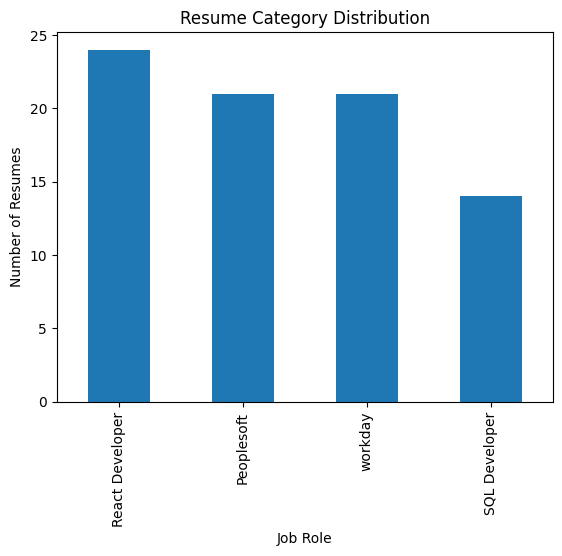

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df["Category"].value_counts().plot(kind='bar')
plt.title("Resume Category Distribution")
plt.xlabel("Job Role")
plt.ylabel("Number of Resumes")
plt.show()


**2. Histogram (Distribution of resume text length)**

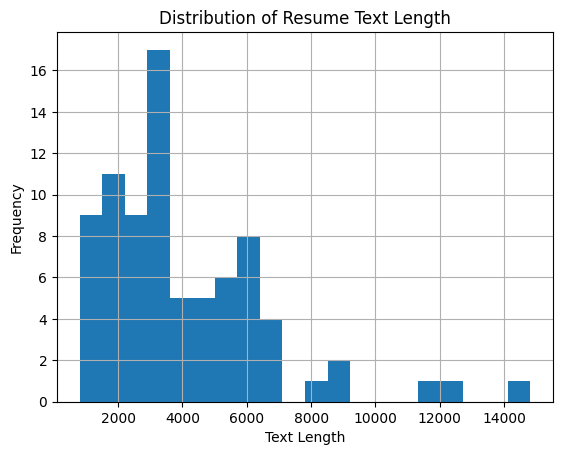

In [ ]:
df["Text_Length"] = df["Clean_Text"].apply(len)

plt.figure()
df["Text_Length"].hist(bins=20)
plt.title("Distribution of Resume Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


**3. Bar plot (Top 20 Most frequent words in Resume)**

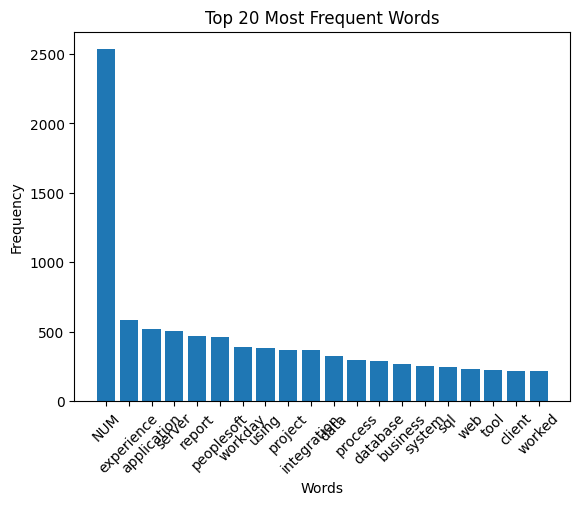

In [ ]:
from collections import Counter

all_words = " ".join(df["Clean_Text"]).split()
word_freq = Counter(all_words)

common_words = dict(word_freq.most_common(20))

plt.figure()
plt.bar(common_words.keys(), common_words.values())
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


**4. Histplot (Word count distribution of resumes)**

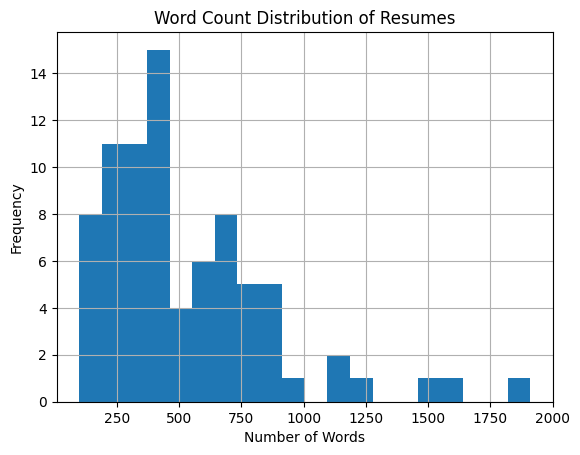

In [ ]:
df["Word_Count"] = df["Clean_Text"].apply(lambda x: len(x.split()))

plt.figure()
df["Word_Count"].hist(bins=20)
plt.title("Word Count Distribution of Resumes")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


**5. Resume File Type**

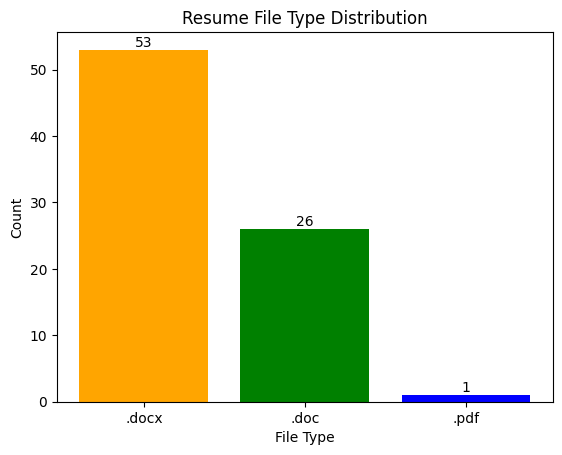

In [ ]:
file_types = [os.path.splitext(f)[1].lower()
              for d in os.listdir(dataset_path)
              for f in os.listdir(os.path.join(dataset_path, d))]

counts = Counter(file_types)

plt.bar(counts.keys(), counts.values(), color=['orange','green','blue'])

for i, v in enumerate(counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.title("Resume File Type Distribution")
plt.xlabel("File Type")
plt.ylabel("Count")
plt.show()



**6. Wordcloud Most common words in resumes**

In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud

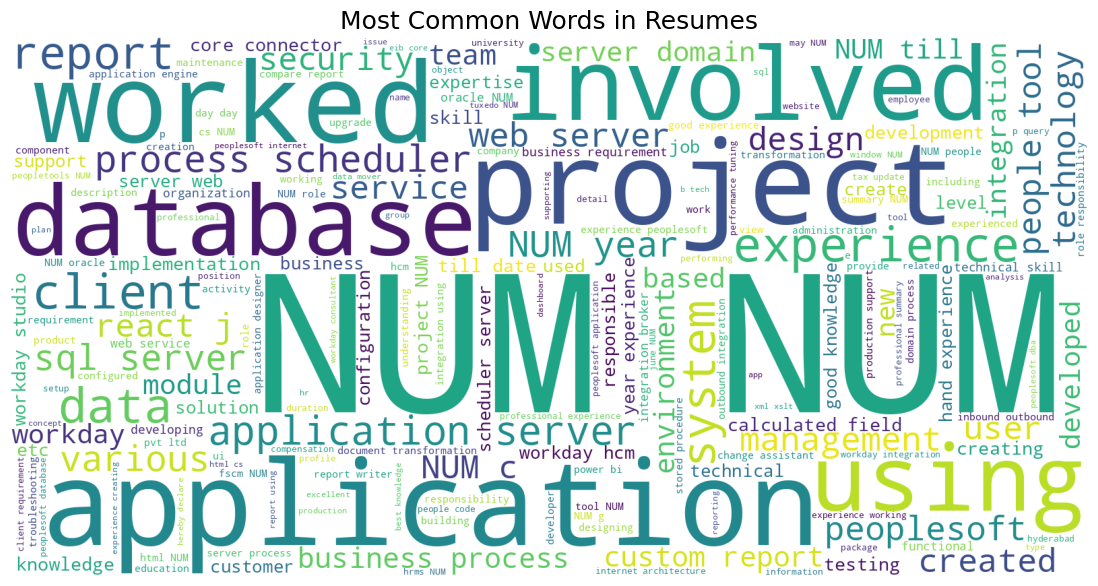

In [ ]:
text = " ".join(df["Clean_Text"])

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(text)

plt.figure(figsize=(16,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in Resumes", fontsize=18)
plt.show()

# **7. TF-IDF VECTORIZATION**

In [ ]:
# converts text to numbers

from sklearn.feature_extraction.text import TfidfVectorizer

# ---- Step 1: Find total available features ----
tfidf_full = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_full = tfidf_full.fit_transform(df["Clean_Text"])

# ---- Step 2: Final TF-IDF with feature limitation ----
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2
)
# Apply Label Encoding on Category Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Category_Encoded"] = le.fit_transform(df["Category"])

X = tfidf.fit_transform(df["Clean_Text"])
y = df["Category_Encoded"]

total_features = len(tfidf_full.get_feature_names_out())
print("Total available features:", total_features)
print("Features used for training:", X.shape[1])
print("Final feature matrix shape:", X.shape)

#Label Mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n",label_mapping)


Total available features: 6923
Features used for training: 5000
Final feature matrix shape: (80, 5000)

 {'Peoplesoft': np.int64(0), 'React Developer': np.int64(1), 'SQL Developer': np.int64(2), 'workday': np.int64(3)}


# **8. MODEL BUILDING & EVALUATION**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **1. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)

In [ ]:
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)

In [ ]:
print("Naive Bayes Train Accuracy:", train_acc_nb)
print("Naive Bayes Test Accuracy:", test_acc_nb)


Naive Bayes Train Accuracy: 1.0
Naive Bayes Test Accuracy: 1.0


# **2. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=5000, C=10)
lr.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=5000)

In [ ]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [ ]:
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

In [ ]:
print("Logistic Regression Train Accuracy:", train_acc_lr)
print("Logistic Regression Test Accuracy:", test_acc_lr)

Logistic Regression Train Accuracy: 1.0
Logistic Regression Test Accuracy: 1.0


# **3. Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

In [ ]:
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

In [ ]:
print("SVM Train Accuracy:", train_acc_svm)
print("SVM Test Accuracy:", test_acc_svm)

SVM Train Accuracy: 1.0
SVM Test Accuracy: 1.0


# **4. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [ ]:
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

In [ ]:
print("Random Forest Train Accuracy:", train_acc_rf)
print("Random Forest Test Accuracy:", test_acc_rf)

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0


# **5. K-Nearest Neighbors(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

In [ ]:
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

In [ ]:
print("KNN Train Accuracy:", train_acc_knn)
print("KNN Test Accuracy:", test_acc_knn)

KNN Train Accuracy: 0.953125
KNN Test Accuracy: 1.0


# **9. CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

models_preds = {
    "Naive Bayes": y_test_pred_nb,
    "Logistic Regression": y_test_pred_lr,
    "SVM": y_test_pred_svm,
    "Random Forest": y_test_pred_rf,
    "KNN": y_test_pred_knn
}

for model, preds in models_preds.items():
    print(f"\n------ {model} Classification Report ------\n")
    print(classification_report(y_test, preds, target_names=le.classes_))



------ Naive Bayes Classification Report ------

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00      1.00         3
        workday       1.00      1.00      1.00         4

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


------ Logistic Regression Classification Report ------

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00      1.00         3
        workday       1.00      1.00      1.00         4

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      

# **10. FINAL ACCURACY COMPARISON TABLE**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

accuracy_table = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "SVM", "Random Forest", "KNN"],
    "Train Accuracy": [
        accuracy_score(y_train, y_train_pred_nb),
        accuracy_score(y_train, y_train_pred_lr),
        accuracy_score(y_train, y_train_pred_svm),
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_train, y_train_pred_knn)
    ],
    "Test Accuracy": [
        accuracy_score(y_test, y_test_pred_nb),
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_svm),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_knn)
    ]
})

accuracy_table


,Model,Train Accuracy,Test Accuracy
0,Naive Bayes,1.000000,1.0
1,Logistic Regression,1.000000,1.0
2,SVM,1.000000,1.0
3,Random Forest,1.000000,1.0
4,KNN,0.953125,1.0


# **11. CROSS VALIDATION OF SVM MODEL**

# **10-Fold Cross Validation**

In [ ]:
# This tests the model on 10 different splits of the data.
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

svm_final = LinearSVC(C=10, max_iter=5000)

cv_scores = cross_val_score(
    svm_final,
    X,
    y,
    cv=10,
    scoring="accuracy"
)

print("10-Fold CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


10-Fold CV Scores: [1.    1.    0.875 1.    1.    1.    1.    0.875 1.    1.   ]
Mean CV Accuracy: 0.975


Model performs perfectly on train & test ✔️

On multiple unseen splits → still 97.5% ✔️

Only small drop (100 → 97.5) ✔️

The SVM model is NOT overfitting.

Instead, it is:

Stable

Consistent

Generalizes well to unseen data

# **Repeated Cross Validation**

In [ ]:
# This repeats CV multiple times with different random splits.
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=5,
    random_state=42
)

repeated_scores = cross_val_score(
    svm_final,
    X,
    y,
    scoring="accuracy",
    cv=cv
)

print("Repeated CV Mean Accuracy:", repeated_scores.mean())


Repeated CV Mean Accuracy: 0.98


Repeated cross-validation is very strong validation because:

Data is shuffled many times

Model is tested on many unseen splits

Removes luck from single train/test split

**Repeated CV Mean Accuracy = 0.98 (98%)**

This means:
The model performs consistently well on new unseen data.


# **12. TRAIN FINAL MODEL**

In [62]:
from sklearn.svm import LinearSVC

final_model = LinearSVC(C=10, max_iter=5000)
final_model.fit(X, y)

print("Final model trained on full dataset")

Final model trained on full dataset


# **13. SAVE FILES FOR DEPLOYMENT**

In [63]:
import pickle

pickle.dump(final_model, open("svm_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))

print("Model files saved successfully!")

Model files saved successfully!
